In [1]:
import pandas as pd
import matplotlib.pyplot as plt
xls = pd.ExcelFile('Desktop/CloudTara/Microsoft_Train.xlsx')
ms = pd.read_excel(xls, 'Sheet1')
print(ms)

   Valuation Date TTM Revenue TTM EBITDA  EBITDA Margin (%)
0      2005-12-31      $8.49B     $0.55B             0.0651
1      2006-12-31     $10.71B     $0.59B             0.0555
2      2007-12-31     $14.84B     $0.90B             0.0607
3      2008-12-31     $19.17B     $1.13B             0.0589
4      2009-12-31     $24.51B     $1.51B             0.0615
5      2010-12-31     $34.20B     $1.97B             0.0577
6      2011-12-31     $48.08B     $1.95B             0.0405
7      2012-12-31     $61.09B     $2.84B             0.0464
8      2013-12-31     $74.45B     $4.00B             0.0537
9      2014-12-31     $88.99B     $4.92B             0.0553
10     2015-12-31    $107.01B     $8.51B             0.0796
11     2016-12-31    $135.99B    $12.30B             0.0905
12     2017-12-31    $177.87B    $15.58B             0.0876
13     2018-12-31    $232.89B    $27.76B             0.1192
14     2019-12-31    $280.52B    $36.33B             0.1295


In [2]:
ms['Revenue1'] = ms['TTM Revenue'].str.replace('$','')
ms['Revenue'] = ms['Revenue1'].str.replace('B','')
ms.drop(['Revenue1'], axis=1)

,Valuation Date,TTM Revenue,TTM EBITDA,EBITDA Margin (%),Revenue
0,2005-12-31,$8.49B,$0.55B,0.0651,8.49
1,2006-12-31,$10.71B,$0.59B,0.0555,10.71
2,2007-12-31,$14.84B,$0.90B,0.0607,14.84
3,2008-12-31,$19.17B,$1.13B,0.0589,19.17
4,2009-12-31,$24.51B,$1.51B,0.0615,24.51
5,2010-12-31,$34.20B,$1.97B,0.0577,34.20
6,2011-12-31,$48.08B,$1.95B,0.0405,48.08
7,2012-12-31,$61.09B,$2.84B,0.0464,61.09
8,2013-12-31,$74.45B,$4.00B,0.0537,74.45
9,2014-12-31,$88.99B,$4.92B,0.0553,88.99


In [3]:
ms['a'] = ms['TTM EBITDA'].str.replace('$','')
ms['EBITDA'] = ms['a'].str.replace('B','')
ms.drop(['Revenue1','a'], axis=1)

,Valuation Date,TTM Revenue,TTM EBITDA,EBITDA Margin (%),Revenue,EBITDA
0,2005-12-31,$8.49B,$0.55B,0.0651,8.49,0.55
1,2006-12-31,$10.71B,$0.59B,0.0555,10.71,0.59
2,2007-12-31,$14.84B,$0.90B,0.0607,14.84,0.90
3,2008-12-31,$19.17B,$1.13B,0.0589,19.17,1.13
4,2009-12-31,$24.51B,$1.51B,0.0615,24.51,1.51
5,2010-12-31,$34.20B,$1.97B,0.0577,34.20,1.97
6,2011-12-31,$48.08B,$1.95B,0.0405,48.08,1.95
7,2012-12-31,$61.09B,$2.84B,0.0464,61.09,2.84
8,2013-12-31,$74.45B,$4.00B,0.0537,74.45,4.00
9,2014-12-31,$88.99B,$4.92B,0.0553,88.99,4.92


In [4]:
ms["Revenue"] = pd.to_numeric(ms["Revenue"])
ms["EBITDA"] = pd.to_numeric(ms["EBITDA"])

In [5]:
ms['Yearly Growth %'] = ((ms['Revenue'] - ms['Revenue'].shift(1))/ms['Revenue'].shift(1))*100

In [6]:
ms['Yearly Growth %'] = ms['Yearly Growth %'].fillna(0)

In [7]:
ms['Valuation Date']=pd.to_datetime(ms['Valuation Date'])
ms=ms.set_index('Valuation Date')

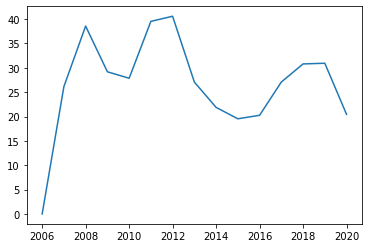

In [8]:
plt.plot(ms.index, ms['Yearly Growth %'])

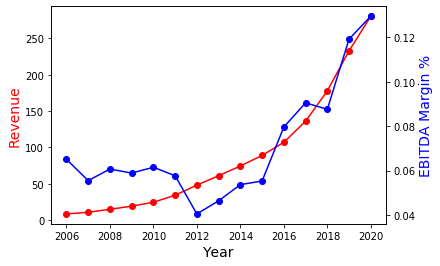

In [24]:
#Correct way of plotting 2 different commodities
fig,ax=plt.subplots()
ax.plot(ms.index, ms["Revenue"], color='red', marker="o")
ax.set_xlabel("Year",fontsize=14)
ax.set_ylabel("Revenue",color="red",fontsize=14)
ax2=ax.twinx()
ax2.plot(ms.index, ms["EBITDA Margin (%)"],color="blue",marker="o")
ax2.set_ylabel("EBITDA Margin %",color="blue",fontsize=14)
plt.show()

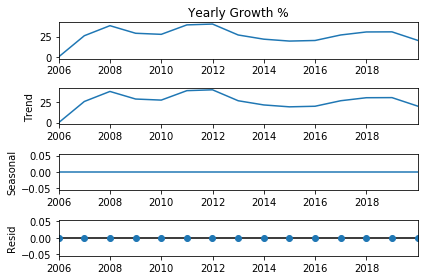

In [25]:
import statsmodels.api as sm
decomposition=sm.tsa.seasonal_decompose(ms['Yearly Growth %'], model='additive')
fig=decomposition.plot()
plt.rcParams['figure.figsize']=[12.0,8.0]

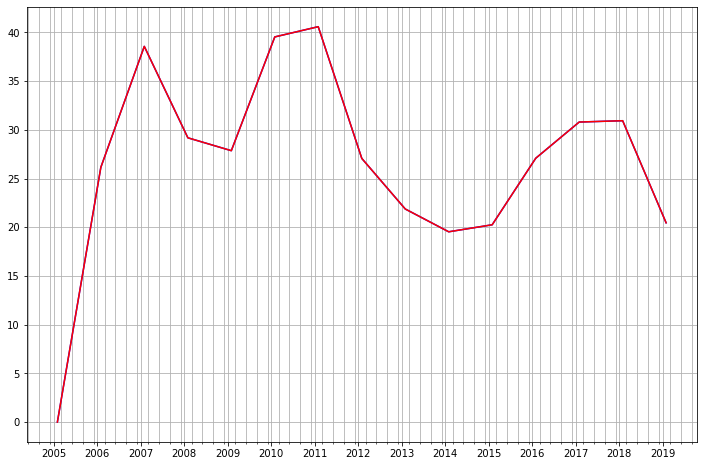

In [26]:
import matplotlib.dates as mdates
fig, ax = plt.subplots()
ax.grid(True)
year = mdates.YearLocator(month=12)
month = mdates.MonthLocator(interval=3)
year_format = mdates.DateFormatter('%Y')
month_format = mdates.DateFormatter('%m')
ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = 'minor')
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)
plt.plot(ms.index, ms['Yearly Growth %'], c='blue')
plt.plot(decomposition.trend.index, decomposition.trend, c='red')

In [31]:
x=ms['Yearly Growth %'].sum()
y=len(ms.index)

In [32]:
Average= (x/(y-1))
print("Average year-on-year growth rate is- ", Average, "%")

Average year-on-year growth rate is-  28.55959133572059 %


In [48]:
ms['Year'] = ms.index.year
mydict = dict(zip(ms['Year'], ms['Yearly Growth %']))

In [55]:
mydict

{2005: 0.0,
 2006: 26.14840989399294,
 2007: 38.56209150326796,
 2008: 29.177897574124,
 2009: 27.856025039123626,
 2010: 39.53488372093024,
 2011: 40.584795321637415,
 2012: 27.059068219633954,
 2013: 21.869373056146664,
 2014: 19.529885829415704,
 2015: 20.249466232160927,
 2016: 27.081581160639196,
 2017: 30.79638208691815,
 2018: 30.932703659976372,
 2019: 20.451715402121174}

In [59]:
for key, value in mydict.items() :
    print (key)

2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019


In [82]:
for key, value in mydict.items():
    if value >=10 and value <=20:
        print("Low growth rate in the year- ", key)
    if value >=20 and value <=30:
        print("Moderate growth rate in the year- ", key)
    if value >=30:
        print("High growth rate in the year- ", key)

Moderate growth rate in the year-  2006
High growth rate in the year-  2007
Moderate growth rate in the year-  2008
Moderate growth rate in the year-  2009
High growth rate in the year-  2010
High growth rate in the year-  2011
Moderate growth rate in the year-  2012
Moderate growth rate in the year-  2013
Low growth rate in the year-  2014
Moderate growth rate in the year-  2015
Moderate growth rate in the year-  2016
High growth rate in the year-  2017
High growth rate in the year-  2018
Moderate growth rate in the year-  2019
